In [2]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

def generate_northstar_dataset(num_students=10000):
    
    # === 1. DEMOGRAPHICS ===
    student_ids = [f"NS_{i}" for i in range(10000, 10000 + num_students)]
    
    # Provinces (Weighted by population/student hubs)
    provinces = ['ON', 'BC', 'QC', 'AB', 'NS', 'MB']
    prov_weights = [0.45, 0.25, 0.15, 0.10, 0.03, 0.02]
    student_prov = np.random.choice(provinces, num_students, p=prov_weights)
    
    # Student Status & Program
    statuses = ['Domestic', 'International']
    programs = ['STEM', 'Business', 'Arts/Humanities', 'Health']
    
    status_list = np.random.choice(statuses, num_students, p=[0.7, 0.3])
    program_list = np.random.choice(programs, num_students, p=[0.35, 0.30, 0.20, 0.15])
    
    # === 2. FINANCIALS (The "Canadian Reality") ===
    data = []
    
    for i in range(num_students):
        prov = student_prov[i]
        status = status_list[i]
        program = program_list[i]
        
        # Rent Logic: ON and BC are expensive
        base_rent = 1200 if prov in ['ON', 'BC'] else 800
        rent = int(np.random.normal(base_rent, 150))
        
        # Income Logic: Co-op/STEM students earn more
        base_income = 1500
        if program in ['STEM', 'Business']: base_income += 500
        if status == 'International': base_income += 200 (Assume GIC payout part of income)
        
        income = int(np.random.normal(base_income, 400))
        income = max(income, 500) # Minimum income floor
        
        # GIC Logic (Crucial for Strategy)
        # International students often have $10k-$20k GIC
        gic_balance = 0
        if status == 'International':
            gic_balance = np.random.choice([0, 10000, 20000], p=[0.4, 0.4, 0.2])
            
        # === 3. CREDIT CARD BEHAVIOR (The Risk Signals) ===
        credit_limit = np.random.choice([500, 1000, 2000, 5000], p=[0.3, 0.4, 0.2, 0.1])
        
        # Spending Behavior
        spend = int(np.random.normal(1000, 300))
        
        # Utilization (Spend / Limit)
        utilization = spend / credit_limit
        
        # Risky Behaviors
        # Cash Advance: Very bad sign (desperation)
        cash_advance_count = 0
        if utilization > 0.9 or income < rent:
            cash_advance_count = np.random.choice([0, 1, 2], p=[0.7, 0.2, 0.1])
            
        # Payment History
        min_payment_missed_last_6m = 0
        if spend > income:
            min_payment_missed_last_6m = np.random.choice([0, 1, 2, 3], p=[0.5, 0.3, 0.15, 0.05])
            
        # === 4. TARGET VARIABLE: DEFAULT (The "Ground Truth") ===
        # Logic: We calculate a hidden "True Risk Score" to determine if they default
        # This ensures the patterns exist for the ML model to find later.
        
        risk_score = 0
        
        # Risk Adders
        if utilization > 0.80: risk_score += 3
        if cash_advance_count > 0: risk_score += 4 # Huge red flag
        if min_payment_missed_last_6m > 0: risk_score += 3
        if (rent / income) > 0.70: risk_score += 2 # High cost of living stress
        
        # Risk Mitigators
        if gic_balance > 0: risk_score -= 5 # Secured by GIC (Safe!)
        if program == 'STEM': risk_score -= 1 # Higher future earning potential
        
        # Probabilistic Default (Sigmoid-ish logic)
        # If Risk Score > 5, high chance of default
        default_prob = 0.05 # Base rate
        if risk_score > 3: default_prob = 0.30
        if risk_score > 6: default_prob = 0.85
        
        is_default = 1 if np.random.random() < default_prob else 0
        
        data.append([
            student_ids[i], prov, status, program, 
            income, rent, gic_balance, 
            credit_limit, spend, utilization, 
            cash_advance_count, min_payment_missed_last_6m, 
            is_default
        ])
        
    cols = ['Student_ID', 'Province', 'Status', 'Program', 
            'Monthly_Income', 'Monthly_Rent', 'GIC_Balance', 
            'Credit_Limit', 'Monthly_Spend', 'Utilization_Ratio', 
            'Cash_Advance_Count', 'Missed_Payments_6m', 
            'Default_Flag']
            
    return pd.DataFrame(data, columns=cols)

# Generate and Save
df = generate_northstar_dataset()
print(f"✅ Generated {len(df)} Student Profiles.")
print(f"📊 Default Rate: {df['Default_Flag'].mean():.2%}")
print("\nSample Data:")
display(df.head())

# Optional: Save to CSV if you are running locally
# df.to_csv('NorthStar_Student_Data.csv', index=False)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1908926106.py, line 40)

In [3]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

def generate_northstar_dataset(num_students=10000):
    
    # === 1. DEMOGRAPHICS ===
    student_ids = [f"NS_{i}" for i in range(10000, 10000 + num_students)]
    
    # Provinces (Weighted by population/student hubs)
    provinces = ['ON', 'BC', 'QC', 'AB', 'NS', 'MB']
    prov_weights = [0.45, 0.25, 0.15, 0.10, 0.03, 0.02]
    student_prov = np.random.choice(provinces, num_students, p=prov_weights)
    
    # Student Status & Program
    statuses = ['Domestic', 'International']
    programs = ['STEM', 'Business', 'Arts/Humanities', 'Health']
    
    status_list = np.random.choice(statuses, num_students, p=[0.7, 0.3])
    program_list = np.random.choice(programs, num_students, p=[0.35, 0.30, 0.20, 0.15])
    
    # === 2. FINANCIALS (The "Canadian Reality") ===
    data = []
    
    for i in range(num_students):
        prov = student_prov[i]
        status = status_list[i]
        program = program_list[i]
        
        # Rent Logic: ON and BC are expensive
        base_rent = 1200 if prov in ['ON', 'BC'] else 800
        rent = int(np.random.normal(base_rent, 150))
        
        # Income Logic: Co-op/STEM students earn more
        base_income = 1500
        if program in ['STEM', 'Business']: base_income += 500
        if status == 'International': base_income += 200 # (Assume GIC payout part of income)
        
        income = int(np.random.normal(base_income, 400))
        income = max(income, 500) # Minimum income floor
        
        # GIC Logic (Crucial for Strategy)
        # International students often have $10k-$20k GIC
        gic_balance = 0
        if status == 'International':
            gic_balance = np.random.choice([0, 10000, 20000], p=[0.4, 0.4, 0.2])
            
        # === 3. CREDIT CARD BEHAVIOR (The Risk Signals) ===
        credit_limit = np.random.choice([500, 1000, 2000, 5000], p=[0.3, 0.4, 0.2, 0.1])
        
        # Spending Behavior
        spend = int(np.random.normal(1000, 300))
        
        # Utilization (Spend / Limit)
        utilization = spend / credit_limit
        
        # Risky Behaviors
        # Cash Advance: Very bad sign (desperation)
        cash_advance_count = 0
        if utilization > 0.9 or income < rent:
            cash_advance_count = np.random.choice([0, 1, 2], p=[0.7, 0.2, 0.1])
            
        # Payment History
        min_payment_missed_last_6m = 0
        if spend > income:
            min_payment_missed_last_6m = np.random.choice([0, 1, 2, 3], p=[0.5, 0.3, 0.15, 0.05])
            
        # === 4. TARGET VARIABLE: DEFAULT (The "Ground Truth") ===
        # Logic: We calculate a hidden "True Risk Score" to determine if they default
        # This ensures the patterns exist for the ML model to find later.
        
        risk_score = 0
        
        # Risk Adders
        if utilization > 0.80: risk_score += 3
        if cash_advance_count > 0: risk_score += 4 # Huge red flag
        if min_payment_missed_last_6m > 0: risk_score += 3
        if (rent / income) > 0.70: risk_score += 2 # High cost of living stress
        
        # Risk Mitigators
        if gic_balance > 0: risk_score -= 5 # Secured by GIC (Safe!)
        if program == 'STEM': risk_score -= 1 # Higher future earning potential
        
        # Probabilistic Default (Sigmoid-ish logic)
        # If Risk Score > 5, high chance of default
        default_prob = 0.05 # Base rate
        if risk_score > 3: default_prob = 0.30
        if risk_score > 6: default_prob = 0.85
        
        is_default = 1 if np.random.random() < default_prob else 0
        
        data.append([
            student_ids[i], prov, status, program, 
            income, rent, gic_balance, 
            credit_limit, spend, utilization, 
            cash_advance_count, min_payment_missed_last_6m, 
            is_default
        ])
        
    cols = ['Student_ID', 'Province', 'Status', 'Program', 
            'Monthly_Income', 'Monthly_Rent', 'GIC_Balance', 
            'Credit_Limit', 'Monthly_Spend', 'Utilization_Ratio', 
            'Cash_Advance_Count', 'Missed_Payments_6m', 
            'Default_Flag']
            
    return pd.DataFrame(data, columns=cols)

# Generate and Save
df = generate_northstar_dataset()
print(f"✅ Generated {len(df)} Student Profiles.")
print(f"📊 Default Rate: {df['Default_Flag'].mean():.2%}")
print("\nSample Data:")
display(df.head())

✅ Generated 10000 Student Profiles.
📊 Default Rate: 18.34%

Sample Data:


,Student_ID,Province,Status,Program,Monthly_Income,Monthly_Rent,GIC_Balance,Credit_Limit,Monthly_Spend,Utilization_Ratio,Cash_Advance_Count,Missed_Payments_6m,Default_Flag
0,NS_10000,ON,Domestic,Arts/Humanities,2356,1105,0,5000,1130,0.226,0,0,0
1,NS_10001,NS,Domestic,STEM,1862,591,0,1000,1360,1.360,0,0,0
2,NS_10002,QC,Domestic,STEM,2573,676,0,2000,620,0.310,0,0,0
3,NS_10003,BC,Domestic,Arts/Humanities,736,1346,0,1000,481,0.481,1,0,0
4,NS_10004,ON,Domestic,Business,1720,1300,0,1000,1134,1.134,0,0,0


/var/folders/1q/j3qg6_1d5wv7xxv83d3rxdd80000gn/T/ipykernel_69179/307969325.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=intl_students, x='GIC_Balance', y='Default_Flag', palette="Greens_r", errorbar=None)
/var/folders/1q/j3qg6_1d5wv7xxv83d3rxdd80000gn/T/ipykernel_69179/307969325.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Province', y='Default_Flag', order=prov_order, palette="Reds_r", errorbar=None)
/var/folders/1q/j3qg6_1d5wv7xxv83d3rxdd80000gn/T/ipykernel_69179/307969325.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effe

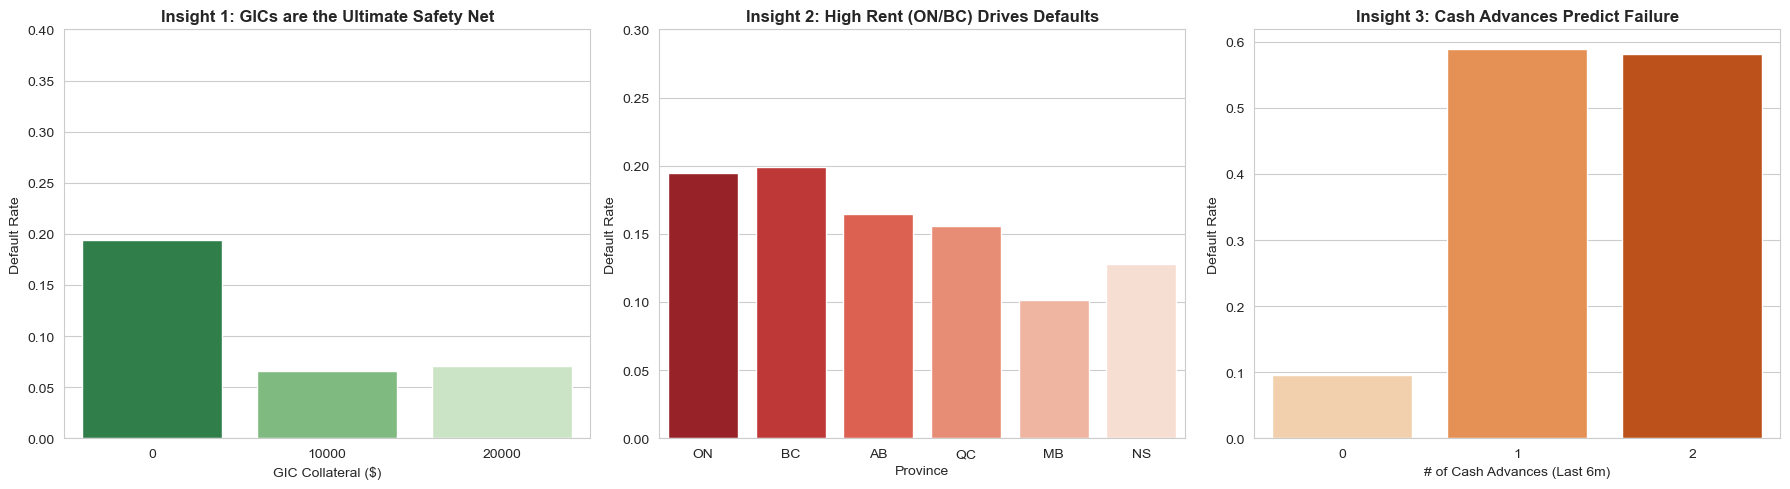

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for "Consulting Deck" look
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

# === CHART 1: The GIC Safety Net (International Students Only) ===
plt.subplot(1, 3, 1)
intl_students = df[df['Status'] == 'International']
sns.barplot(data=intl_students, x='GIC_Balance', y='Default_Flag', palette="Greens_r", errorbar=None)
plt.title("Insight 1: GICs are the Ultimate Safety Net", fontsize=12, fontweight='bold')
plt.xlabel("GIC Collateral ($)", fontsize=10)
plt.ylabel("Default Rate", fontsize=10)
plt.ylim(0, 0.4)

# === CHART 2: The Geography of Risk (Cost of Living) ===
plt.subplot(1, 3, 2)
# Order provinces by "Most Expensive" to "Least"
prov_order = ['ON', 'BC', 'AB', 'QC', 'MB', 'NS']
sns.barplot(data=df, x='Province', y='Default_Flag', order=prov_order, palette="Reds_r", errorbar=None)
plt.title("Insight 2: High Rent (ON/BC) Drives Defaults", fontsize=12, fontweight='bold')
plt.ylabel("Default Rate", fontsize=10)
plt.ylim(0, 0.3)

# === CHART 3: The "Cash Advance" Warning ===
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='Cash_Advance_Count', y='Default_Flag', palette="Oranges", errorbar=None)
plt.title("Insight 3: Cash Advances Predict Failure", fontsize=12, fontweight='bold')
plt.xlabel("# of Cash Advances (Last 6m)", fontsize=10)
plt.ylabel("Default Rate", fontsize=10)

plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, classification_report

# === 1. PREPROCESSING (Making data machine-readable) ===
# Drop IDs (not predictive)
df_clean = df.drop(columns=['Student_ID'])

# Convert Categories (Province, Program, Status) into Numbers (One-Hot Encoding)
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Split features (X) and target (y)
X = df_encoded.drop(columns=['Default_Flag'])
y = df_encoded['Default_Flag']

# Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 2. THE MODEL BAKE-OFF ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

print("🚀 Training Models... (This might take a moment)\n")

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict (Probabilities are needed for AUC)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Score
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    rec = recall_score(y_test, y_pred)
    
    results.append([name, acc, auc, rec])
    print(f"✅ {name} Completed.")

# === 3. THE SCORECARD ===
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC-AUC", "Recall (Catch Rate)"])
print("\n🏆 CHAMPION VS CHALLENGER RESULTS 🏆")
display(results_df.sort_values(by="ROC-AUC", ascending=False))

# === 4. WINNER SELECTION ===
# We will use the best model for the detailed report next
best_model_name = results_df.sort_values(by="ROC-AUC", ascending=False).iloc[0]['Model']
print(f"\n👉 Recommendation: We should deploy **{best_model_name}** because it has the best ability to discriminate between Risk and Safety.")

🚀 Training Models... (This might take a moment)



/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Logistic Regression Completed.
✅ Random Forest Completed.
✅ XGBoost Completed.

🏆 CHAMPION VS CHALLENGER RESULTS 🏆


/opt/miniconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [23:22:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,ROC-AUC,Recall (Catch Rate)
1,Random Forest,0.8965,0.847310,0.579832
2,XGBoost,0.8850,0.844863,0.577031
0,Logistic Regression,0.8750,0.833409,0.456583



👉 Recommendation: We should deploy **Random Forest** because it has the best ability to discriminate between Risk and Safety.


/var/folders/1q/j3qg6_1d5wv7xxv83d3rxdd80000gn/T/ipykernel_69179/413196371.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=feature_names[indices][:10], palette="viridis")


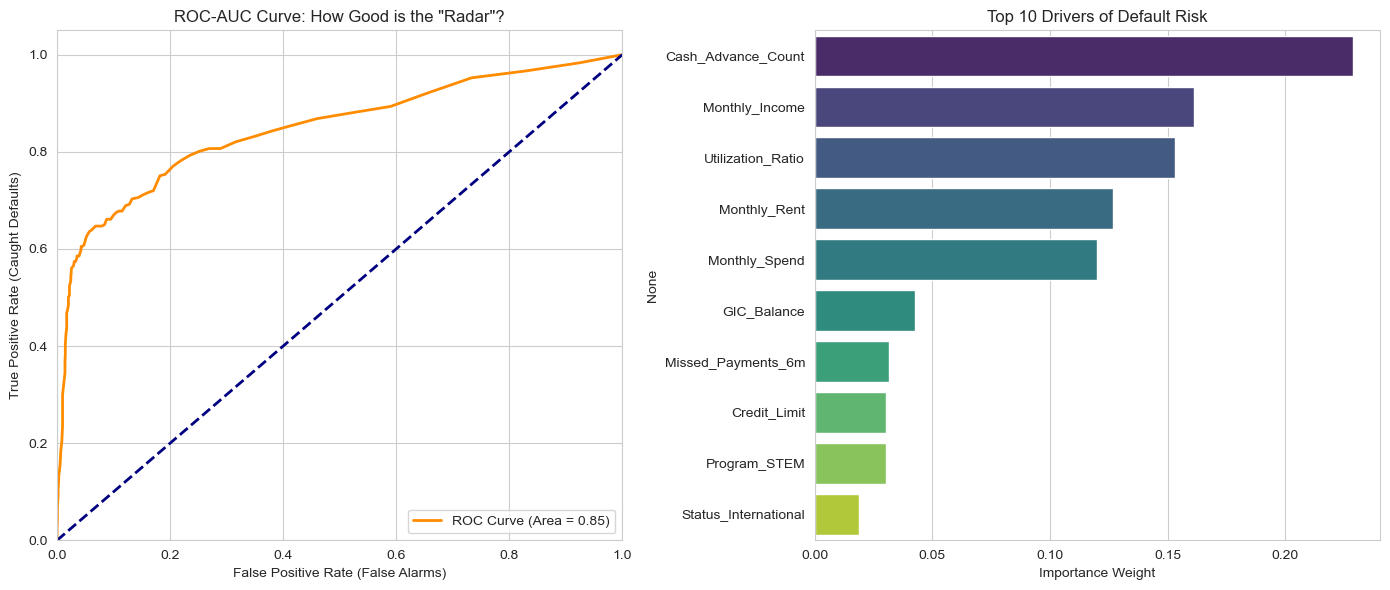

🔍 STRATEGY INSIGHTS GENERATED:
1. The Top Predictor of Risk is: **Cash_Advance_Count**
2. The Second Predictor is: **Monthly_Income**
3. Does GIC Balance matter? Look for 'GIC_Balance' in the chart!


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# === 1. VISUALIZE THE ROC CURVE (The "Radar" Check) ===
# We use the winner: Random Forest
y_pred_prob = models['Random Forest'].predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(14, 6))

# Plot ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (Area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # The "Coin Flip" line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Caught Defaults)')
plt.title('ROC-AUC Curve: How Good is the "Radar"?')
plt.legend(loc="lower right")

# === 2. VISUALIZE FEATURE IMPORTANCE (The Strategy Drivers) ===
# Extract importance from the trained Random Forest model
importances = models['Random Forest'].feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1] # Sort descending

plt.subplot(1, 2, 2)
sns.barplot(x=importances[indices][:10], y=feature_names[indices][:10], palette="viridis")
plt.title("Top 10 Drivers of Default Risk")
plt.xlabel("Importance Weight")

plt.tight_layout()
plt.show()

# === PRINT THE "INSIGHTS" FOR YOUR INTERVIEW ===
print("🔍 STRATEGY INSIGHTS GENERATED:")
print(f"1. The Top Predictor of Risk is: **{feature_names[indices[0]]}**")
print(f"2. The Second Predictor is: **{feature_names[indices[1]]}**")
print(f"3. Does GIC Balance matter? Look for 'GIC_Balance' in the chart!")